In [1]:
import numpy as np
import glob
from collections import defaultdict
import random
import re
import copy
import sys
import importlib
import seaborn as sns
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
from my_plot import MyPlotData

script_n = 'selectivity_across_pct_220320'

In [2]:
def dropN(results, n=3):
    #some results are invalid (stuck at ~50% acc), we'll just drop them
    filtered = copy.deepcopy(results)
    for model in filtered:
        for th in filtered[model]:
            for i in range(n):
                filtered[model][th].remove(min(filtered[model][th]))
    return filtered

In [3]:

num_patterns = 800
variability = 0.4
num_patterns = 150
sigmoid_scale = 16
test_noise = 0.05
lr = 0.02
momentum = 0.9
num_epochs = 300

pcts = [i/100 for i in range(5, 105, 5)]

results = defaultdict(lambda: defaultdict(list))
search = re.compile("acc: (.+)")

for pct in pcts:
    for selective in [0, 1]:
        files = glob.glob(
            f"../pc_test_220320_eval/log_test3_{pct}_{variability}_{num_patterns}_{sigmoid_scale}_{test_noise}_{lr}_{momentum}_{num_epochs}_{selective}_*/results")
        for f in files:
            with open(f) as fin:
                accs = []
                for line in fin:
                    m = search.match(line)
                    if m:
                        accs.append(float(m.group(1)))
                model = 'selective' if selective else 'non-selective'
                results[model][pct].append(max(accs))

filtered_results = dropN(results, n=0)
# for m in filtered_results:
#     print(m)
#     for th in sorted(filtered_results[m]):
#         print(f'{th}: {sorted(filtered_results[m][th])}')

In [33]:
for m in filtered_results:
    print(m)
    for th in sorted(filtered_results[m]):
        print(f'{th}: {sorted(filtered_results[m][th])}')
        print()

non-selective
0.05: [0.46, 0.4666666666666667, 0.48, 0.48, 0.48, 0.4866666666666667, 0.5066666666666667, 0.5066666666666667, 0.54, 0.5733333333333334]

0.1: [0.46, 0.4666666666666667, 0.48, 0.48, 0.48, 0.4866666666666667, 0.5066666666666667, 0.5066666666666667, 0.54, 0.5733333333333334]

0.15: [0.46, 0.48, 0.48, 0.4866666666666667, 0.5066666666666667, 0.5066666666666667, 0.54, 0.5733333333333334, 0.66, 0.7666666666666667]

0.2: [0.46, 0.48, 0.48, 0.54, 0.62, 0.6666666666666666, 0.6866666666666666, 0.72, 0.78, 0.8266666666666667]

0.25: [0.46, 0.48, 0.6866666666666666, 0.7, 0.7266666666666667, 0.7533333333333333, 0.7666666666666667, 0.8533333333333334, 0.86, 0.86]

0.3: [0.6066666666666667, 0.7066666666666667, 0.7466666666666667, 0.7466666666666667, 0.7466666666666667, 0.7933333333333333, 0.82, 0.82, 0.88, 0.8866666666666667]

0.35: [0.6866666666666666, 0.78, 0.8066666666666666, 0.82, 0.82, 0.82, 0.84, 0.86]

0.4: [0.7066666666666667, 0.7933333333333333, 0.8, 0.8066666666666666, 0.81333

In [5]:

name_map = {
        'non-selective': "Random subsampled",
        'selective': "Selective subsampled",
}

palette = {
    name_map['non-selective']: 'black',
    name_map['selective']: 'green',
}

Height: 3, Aspect: 1.3333333333333333


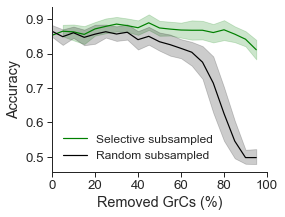

In [9]:

mpd = MyPlotData()

for model in filtered_results:
    for th in filtered_results[model]:
        for v in filtered_results[model][th]:
            mpd.add(
#                 model=model,
                model=name_map[model],
                threshold=th,
                removed=(1-th)*100,
                acc=v,
            )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower left', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd, x='removed', y='acc',
    hue='model',
    context='paper',
    palette=palette,
    hue_order=['Selective subsampled', 'Random subsampled'],
    width=4, height=3,
    y_axis_label='Accuracy',
    x_axis_label='Removed GrCs (%)',
    xlim=[0, 100],
    save_filename=f'{script_n}_fig.svg',
    custom_legend_fn=custom_legend_fn,
    show=True,
    )
